In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 读取数据
features = pd.read_excel('优化后数据集合.xlsx')
label1 = np.array(features['失效反向数'])  # 将每个值除以2
features = features.drop(['失效反向数'], axis=1)
label1 = np.log(label1)

# 定义MAPE函数
def mape_function(predicted, actual):
    diff = np.abs(actual - predicted)
    pct_diff = diff / np.abs(actual)
    mape = np.mean(pct_diff) * 100
    return mape

# 数据归一化
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
data_x4 = features_normalized
data_y4 = label1

# 构建支持向量机回归模型
model_seed = 100
model_rf = RandomForestRegressor(random_state=model_seed)

# 10折交叉验证
crossvalidation = KFold(n_splits=10, shuffle=True)
r2_rf = []
for train_index, test_index in crossvalidation.split(data_x4):
    model_rf.fit(data_x4[train_index], data_y4[train_index])
    y_pred = model_rf.predict(data_x4[test_index])
    r2_rf.append(r2_score(data_y4[test_index], y_pred))

mean_r2 = np.mean(r2_rf)
print(f'10折交叉验证平均R2值: {mean_r2:.2f}')

# 交叉验证预测
y_cv2_rf = cross_val_predict(model_rf, data_x4, data_y4, cv=crossvalidation)

# 计算MAPE
mape = mape_function(y_cv2_rf, data_y4)
print(f'10折交叉验证平均MAPE值: {mape:.2f}')

10折交叉验证平均R2值: 0.82
10折交叉验证平均MAPE值: 9.20


NameError: name 'y_cv2_svr' is not defined

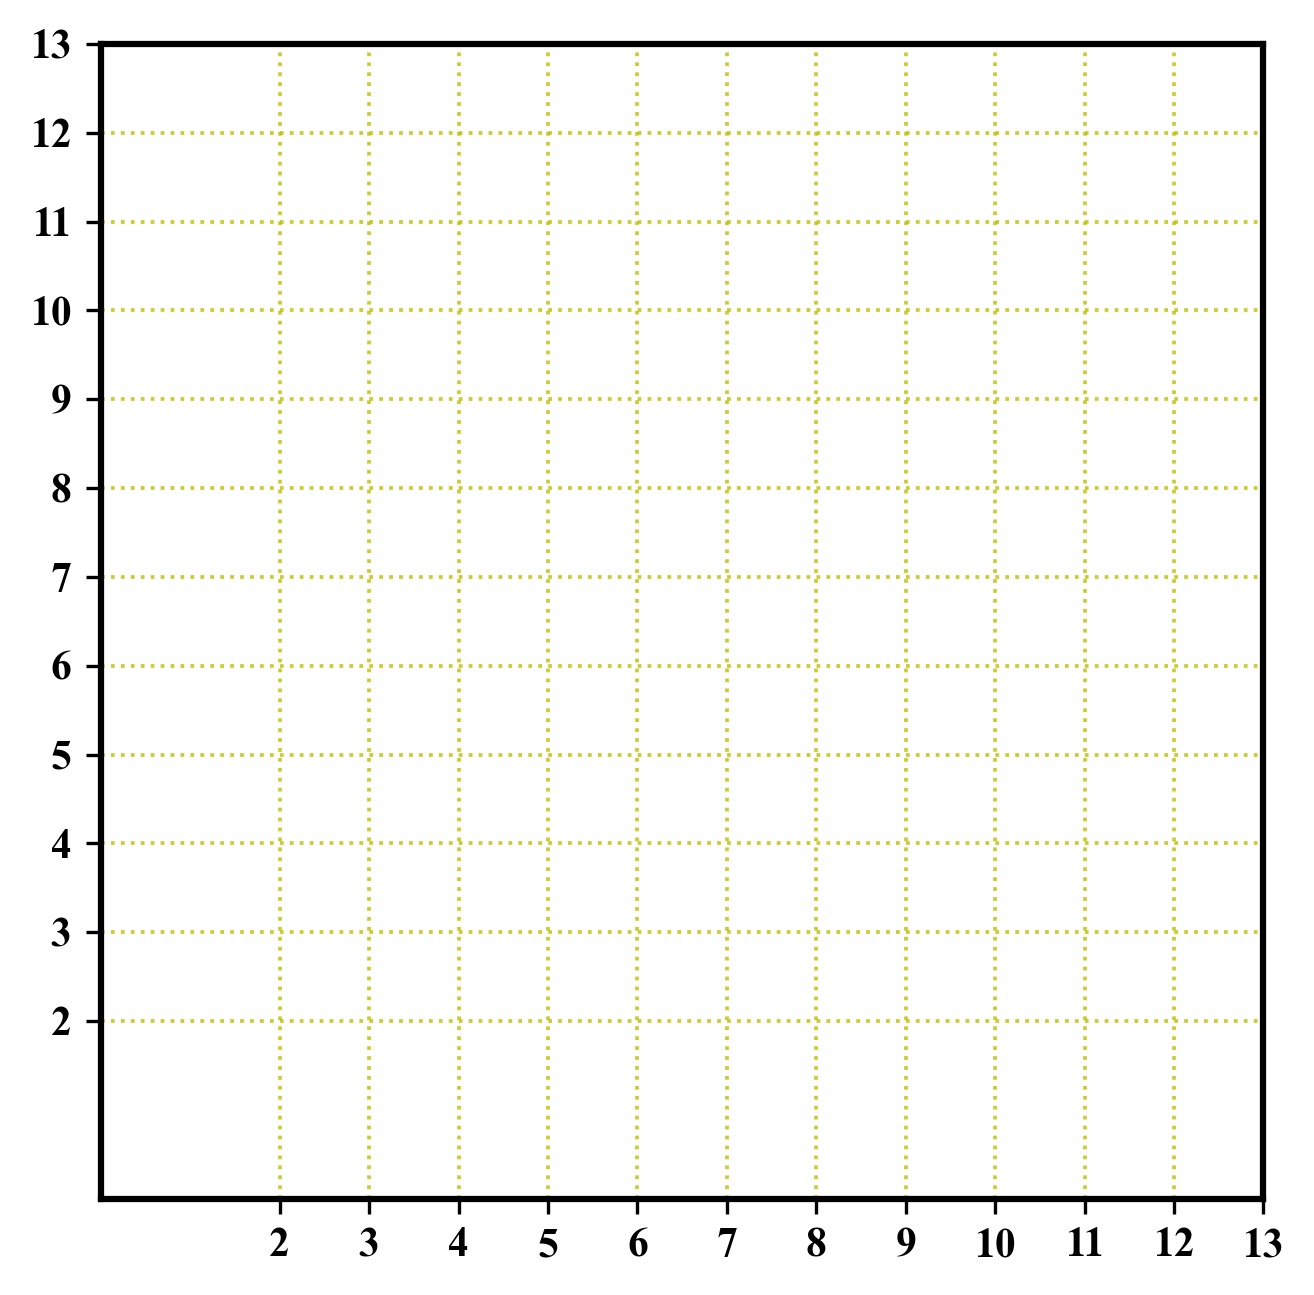

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 10})

# Customize plot borders
ax = plt.axes()
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.8, grid_linewidth=0.9, grid_linestyle=':')
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # Set border thickness
    spine.set_color('black')  # Set border color
# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(2, 13.1, 1))
plt.xticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
plt.yticks(new_ticks, fontsize=10,weight='bold',fontname='Times New Roman')
# 绘制散点图
plt.scatter(data_y4, y_cv2_rf, alpha=0.9, s=33, linewidths=0.4, c='#B5E1E2',
            edgecolor='#000000', marker='o')
# 添加图例
plt.plot([2, 13.1], [2, 13.1], 'b--', linewidth='0.8', alpha=0.8)
plt.ylim(2,13)
plt.xlim(2,13)
# Display the plot
plt.xlabel('log(Real--fatigue life($N_f$))', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.ylabel('log(Predicted--fatigue life($N_f$))', size=15,weight='bold',labelpad=15,fontname='Times New Roman')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()